 # UBER DATASET ANALYSIS

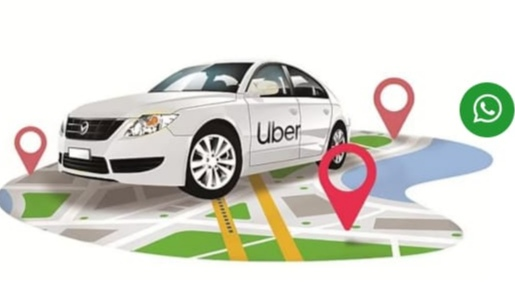

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from colorama import Fore, Style

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor ,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR,LinearSVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from catboost import CatBoostRegressor
import lightgbm as lgb

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### DESCRIPTION ABOUT UBER:

Uber is a multinational transportation network company that operates a platform connecting riders with drivers through a mobile app.
It was founded in 2009 and has since become one of the most well-known examples of a ride-hailing service. Uber allows users to request a ride from their
current location to a desired destination using their smartphone. The app matches the user with an available driver in the area, and the driver arrives 
to pick up the passenger.

Uber offers various types of services, including UberX (standard car), UberXL (larger vehicles), UberBlack (luxury vehicles), and UberPOOL 
(shared rides with other passengers traveling in the same direction). The fares for rides are calculated based on factors such as distance traveled,
time spent on the trip, and demand at the time of the request.

In [43]:
df=pd.read_excel('UberDataset.xlsx')
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-02-01 01:25:00,2016-02-01 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,2016-02-01 20:25:00,2016-02-01 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-05-01 17:31:00,2016-05-01 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-06-01 14:42:00,2016-06-01 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


#### DESCRIPTION ABOUT DATASET

###### START_DATE: Timestamp that marks the start of the trip.
###### END_DATE: Timestamp that marks the end of the trip.
###### CATEGORY: Uber customer category.
###### START: Location that marks the start of the trip. 
###### STOP: Location that marks the start of the trip.
###### MILES: Travel distance.
###### PURPOSE: Customer's purpose of ordering Ube

### GETTING INFO

In [44]:
df.shape

(1156, 7)

In [45]:
df.size

8092

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [47]:
df.describe()   

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


##### Other than miles all are categorical variables

##### CHECKING NULL & DUPLICATES 

In [48]:
df.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [49]:
df.duplicated().sum()

1

##### DROP DUPLICATES

In [50]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()                                        # Now there is no duplicates in dataset

0

In [51]:
# Drop null values in the column

columns_to_check = ['END_DATE', 'CATEGORY', 'START', 'STOP']
df.dropna(subset=columns_to_check, inplace=True)
df.dropna()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
2,2016-02-01 20:25:00,2016-02-01 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-05-01 17:31:00,2016-05-01 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-06-01 14:42:00,2016-06-01 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,2016-06-01 17:15:00,2016-06-01 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
...,...,...,...,...,...,...,...
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site


In [52]:
df.isnull().sum()        # Only purpose column have more null values

START_DATE      0
END_DATE        0
CATEGORY        0
START           0
STOP            0
MILES           0
PURPOSE       502
dtype: int64

##### IMPUTE NULL VALUES

In [53]:
## PURPODE COLUMNS ONLY HAVE MORE NULL VALUES SO HAVE TO IMPUTE 

df['PURPOSE'].fillna('Not specified Purpose', inplace=True)
df.head(2)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-02-01 01:25:00,2016-02-01 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not specified Purpose


In [54]:
# CHANGING column's name for convinent reading

df.rename(columns = {'START': 'STARTING_POINT' ,'STOP' : 'STOPING_POINT'},inplace=True)
df.head(2)          

,START_DATE,END_DATE,CATEGORY,STARTING_POINT,STOPING_POINT,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-02-01 01:25:00,2016-02-01 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not specified Purpose


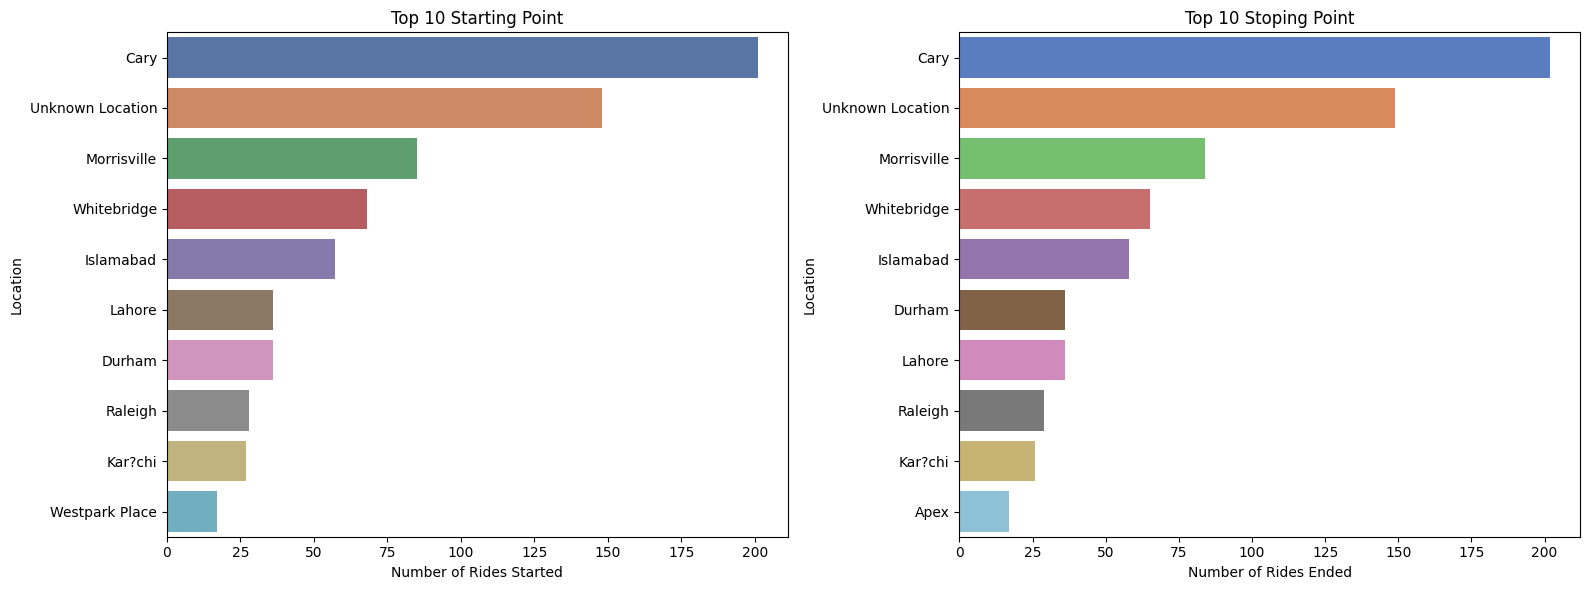

In [55]:
# TOP 10 STARTING & STOPING POINT


Top_start_location = df['STARTING_POINT'].value_counts().idxmax()
Top_stop_location = df['STOPING_POINT'].value_counts().idxmax()

# Count the number of rides for Starting & Stoping point
starting_point_counts = df['STARTING_POINT'].value_counts().reset_index()
starting_point_counts.columns = ['Location', 'Number of Starts']

stoping_point_counts = df['STOPING_POINT'].value_counts().reset_index()
stoping_point_counts.columns = ['Location', 'Number of Stops']

plt.figure(figsize=(16, 6))

# Plot for starting point
plt.subplot(1, 2, 1)
sns.barplot(x='Number of Starts', y='Location', data=starting_point_counts.head(10), palette='deep')
plt.title('Top 10 Starting Point')
plt.xlabel('Number of Rides Started')
plt.ylabel('Location')

# Plot for stoping point
plt.subplot(1, 2, 2)
sns.barplot(x='Number of Stops', y='Location', data=stoping_point_counts.head(10), palette='muted')
plt.title('Top 10 Stoping Point')
plt.xlabel('Number of Rides Ended')
plt.ylabel('Location')
plt.tight_layout()
plt.show()

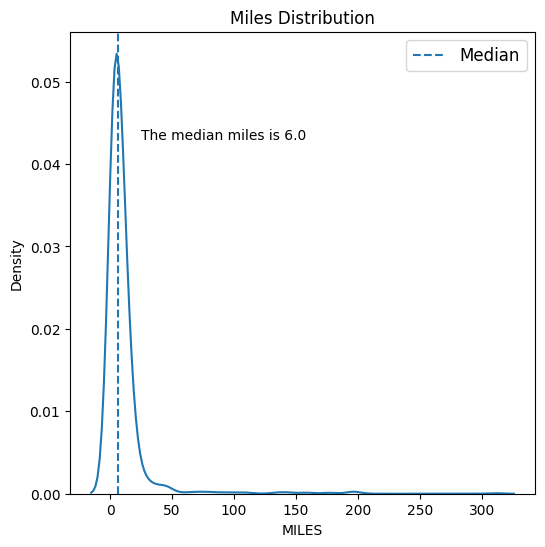

In [56]:
# MILES DISTRIBUTION

miles_median = df['MILES'].median()
fig, ax = plt.subplots(figsize = (6,6))

# Plotting 
sns.kdeplot(data = df,x = 'MILES',ax=ax)
    
ax.set_title('Miles Distribution')
ax.axvline(miles_median, linestyle='--', label = 'Median')
ax.annotate(f'The median miles is {miles_median}', xy = (25,0.043), fontsize = 10)
ax.legend(fontsize='large')
plt.show()

##### While the median trip distance in this dataset is 6 miles, the distribution exhibits a right-skewed pattern, suggesting the presence of outliers 
##### in the trip distances recorded.

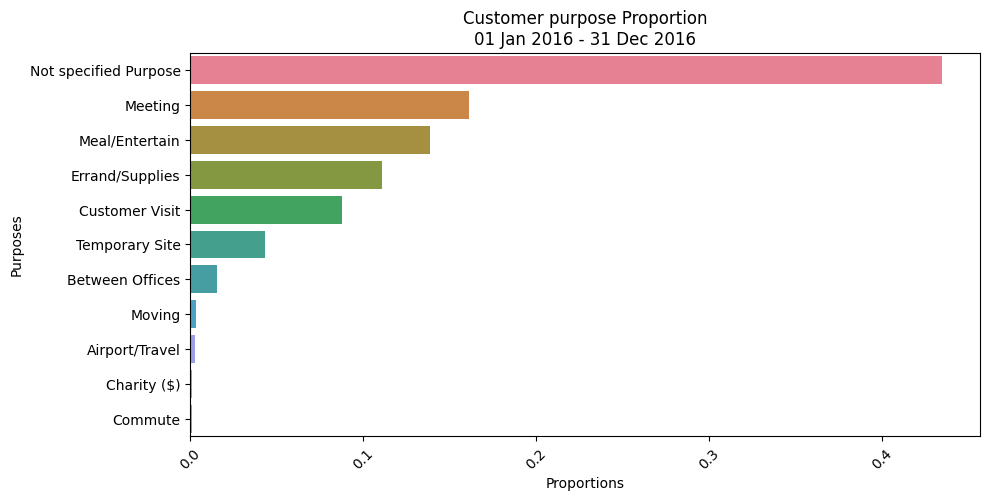

In [57]:
# CUSTOMER'S PURPOSE PROPORTION


purpose_proportion = df['PURPOSE'].value_counts(normalize=True)

# Generate a palette with different colors for each bar
palette = sns.color_palette("husl", len(purpose_proportion))

fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=purpose_proportion.values, y=purpose_proportion.index, ax=ax, palette=palette)
plt.title('Customer purpose Proportion\n01 Jan 2016 - 31 Dec 2016')
plt.xlabel('Proportions')
plt.ylabel('Purposes')
plt.tight_layout()
plt.xticks(rotation=45)          # Rotate x-axis labels for better readability
plt.show()

In [58]:
# CHANGING THE DATATYPE IN THE DATETIME FORMAT FOR MORE READABILITY


import datetime as dt

df["START_DATE"] = pd.to_datetime(df["START_DATE"])
df["END_DATE"] = pd.to_datetime(df["END_DATE"])


In [59]:

df["START_TIME"]=df['START_DATE'].dt.strftime('%H:%M')
df["END_TIME"]=df['END_DATE'].dt.strftime('%H:%M')
df.head(2)

,START_DATE,END_DATE,CATEGORY,STARTING_POINT,STOPING_POINT,MILES,PURPOSE,START_TIME,END_TIME
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21:11,21:17
1,2016-02-01 01:25:00,2016-02-01 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not specified Purpose,01:25,01:37


In [60]:
# Create new column Time period 

df['Request Hour'] = df['START_DATE'].dt.hour
TIME_PERIOD = {
    0: 'Late Night',
    1: 'Midnight',
    2: 'Midnight',
    3: 'Early Morning',
    4: 'Early Morning',
    5: 'Early Morning',
    6: 'Morning',
    7: 'Morning',
    8: 'Morning',
    9: 'Morning',
    10: 'Morning',
    11: 'Morning',
    12: 'After Noon',
    13: 'After Noon',
    14: 'After Noon',
    15: 'After Noon',
    16: 'Evening',
    17: 'Evening',
    18: 'Evening',
    19: 'Night',
    20: 'Night',
    21: 'Night',
    22: 'Late Night',
    23: 'Late Night',
}

df['TIME_PERIOD'] = df['Request Hour'].apply(lambda x: TIME_PERIOD.get(x))
df.head(2)

,START_DATE,END_DATE,CATEGORY,STARTING_POINT,STOPING_POINT,MILES,PURPOSE,START_TIME,END_TIME,Request Hour,TIME_PERIOD
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21:11,21:17,21,Night
1,2016-02-01 01:25:00,2016-02-01 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not specified Purpose,01:25,01:37,1,Midnight


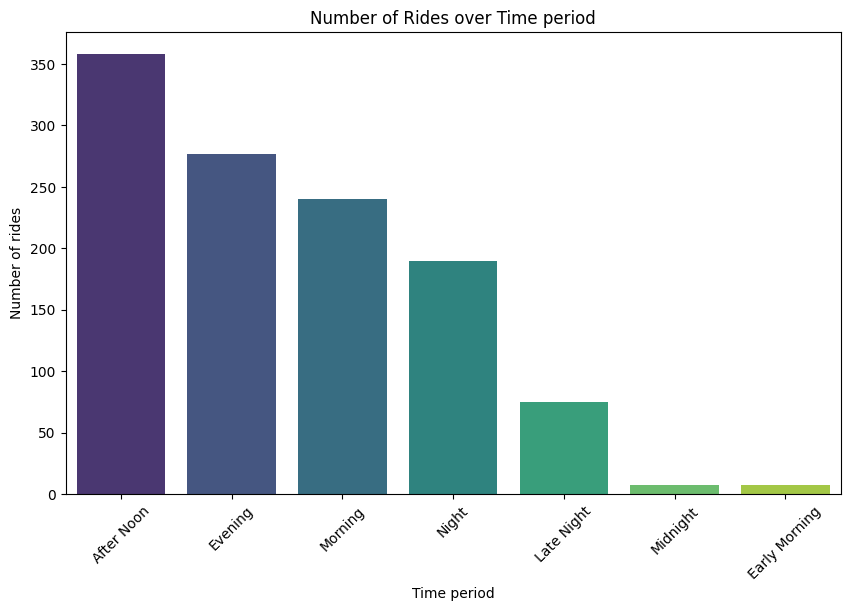

In [61]:
# NUMBER OF RIDES OVER PERIOD

time_period_counts = df['TIME_PERIOD'].value_counts()

# Create a color palette for the bars
palette = sns.color_palette("viridis", len(time_period_counts))

# Visualization: Distribution of Trips in Different Time Slots
plt.figure(figsize=(10, 6))
sns.barplot(x=time_period_counts.index, y=time_period_counts.values,palette= palette)
plt.title('Number of Rides over Time period')
plt.xlabel('Time period')
plt.ylabel('Number of rides')
plt.xticks(rotation=45)
plt.show()


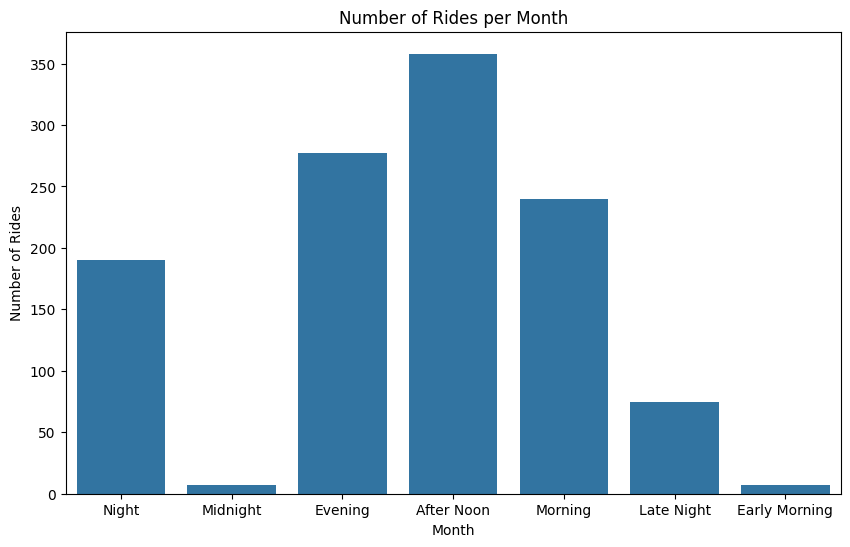

In [62]:
# Plot the number of rides per month
plt.figure(figsize=(10, 6))
sns.countplot(x='TIME_PERIOD', data=df)
plt.title('Number of Rides per Month')
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.show()


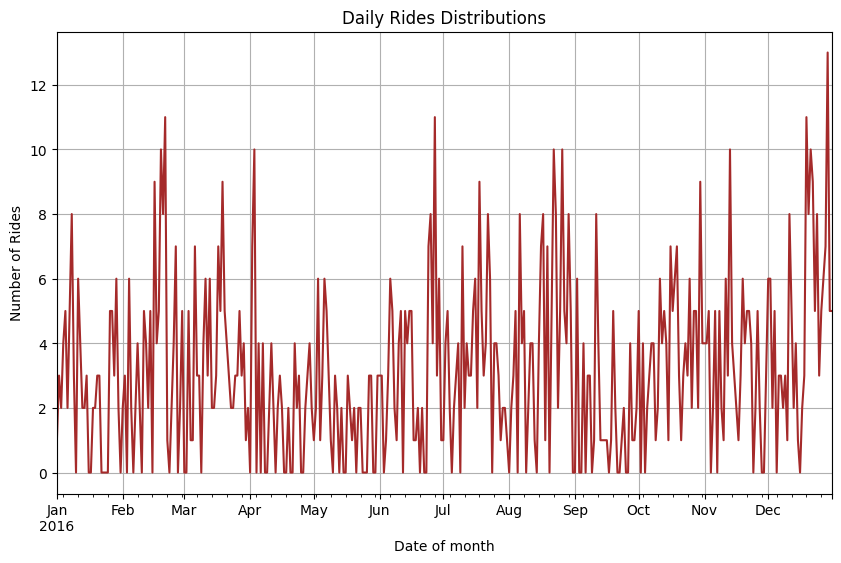

In [63]:
# UBER RIDES OVER DAY

daily_trips = df.resample('D', on='START_DATE').size()
plt.figure(figsize=(10, 6))
daily_trips.plot(title='Daily Rides Distributions', color='brown')
plt.xlabel('Date of month')
plt.ylabel('Number of Rides')
plt.grid(True)
plt.show()

##### The line graph charts Uber rides frequency throughout a year, showing ups and downs in daily rides.
##### Some days stand out with more rides, likely linked to special occasions or holidays. No clear seasonal pattern emerges, indicating 
##### changing demand for ride-hailing services over time, highlighting its unpredictable nature.


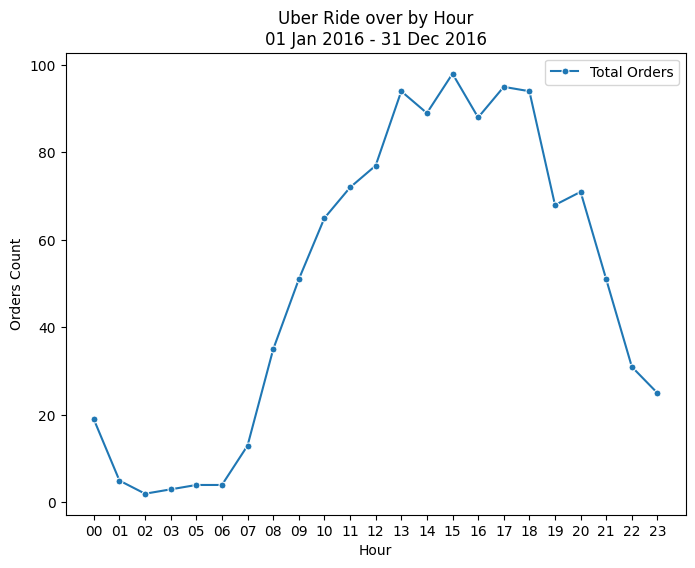

In [64]:
# UBER RIDE OVER HOUR

# Copying the data
hourly_data = df.copy()

# Crete hour column
hourly_data['HOUR'] = hourly_data['START_DATE'].apply(lambda x: x.strftime('%H'))
hourly_data_count = hourly_data.groupby(['HOUR']).size().reset_index(name='COUNT')
fig, ax = plt.subplots(figsize=(8,6))
sns.lineplot( data = hourly_data_count, x = 'HOUR', y = 'COUNT',ax = ax,label = 'Total Orders',marker = '.',markersize =10 )

# Labelling
ax.set_title('Uber Ride over by Hour\n01 Jan 2016 - 31 Dec 2016')
ax.set_ylabel('Orders Count')
ax.set_xlabel('Hour')

plt.show()

##### From 6 a.m., there's a noticeable uptick in incoming orders. However, it's from 1 p.m. to 6 p.m. when we experience a significant surge in rides,
##### indicating a pronounced peak during those hours. Interestingly, in 2016, there wasn't a single Uber order recorded between 4 a.m. and 5 a.m.
##### This absence of activity during that specific time interval is quite striking and stands out within the data from that year


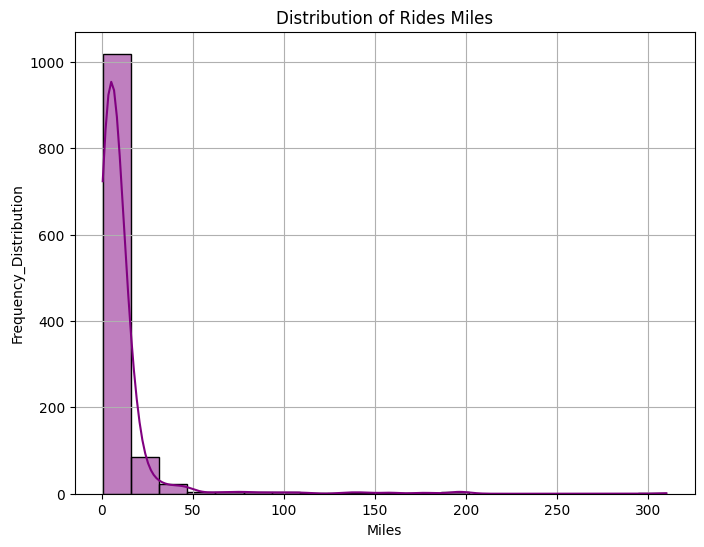

In [65]:
# AVERAGE MILES TRAVELED

plt.figure(figsize=(8, 6))
sns.histplot(df['MILES'], bins=20, kde=True, color='purple')
plt.title('Distribution of Rides Miles')
plt.xlabel('Miles')
plt.ylabel('Frequency_Distribution')
plt.grid(True)
plt.show()

##### The histogram displays a right-skewed distribution, emphasizing that the majority of trips cover short distances, likely local or
##### within city limits. The peak frequency around shorter mile ranges signifies their prevalence. 
##### Conversely, the diminishing frequency as distances increase illustrates fewer, albeit existing, longer journeys. 
##### This pattern showcases the dominance of short trips while acknowledging the presence of occasional longer-distance travel within the dataset.

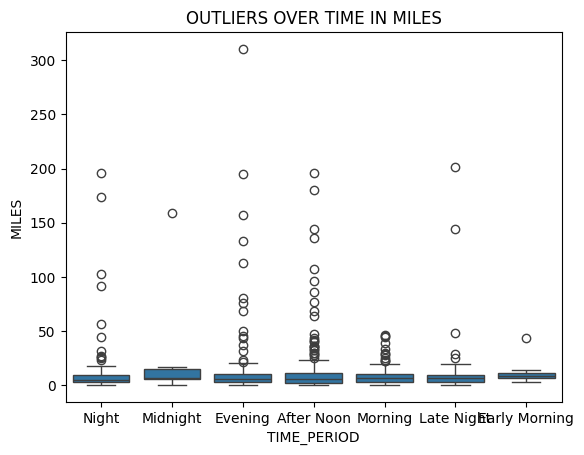

In [66]:
# OUTLIERS OVER TIME IN MILES

sns.boxplot(x=df["TIME_PERIOD"],y=df["MILES"])
plt.title("OUTLIERS OVER TIME IN MILES")
plt.xlabel('TIME_PERIOD')
plt.ylabel('MILES')
plt.show()

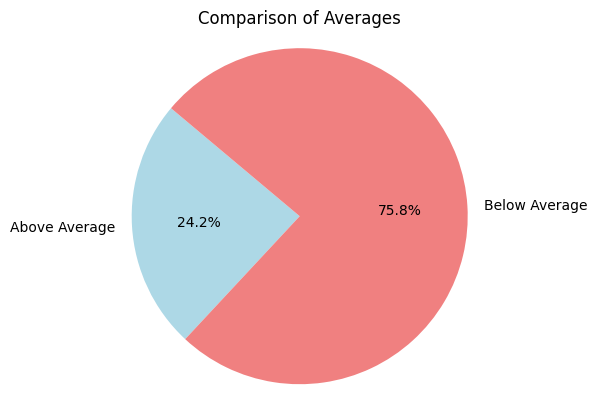

In [67]:
# COMPARISION OF AVERAGES

average_value = df['MILES'].mean()

# Compare values with the average and categorize them
above_average = df[df['MILES'] > average_value].shape[0]
below_average = df[df['MILES'] <= average_value].shape[0]
sizes = [above_average, below_average]
labels = ['Above Average', 'Below Average']
colors = ['lightblue', 'lightcoral']

# Create a pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal') 
# labelling
plt.title('Comparison of Averages')
plt.show()

In [68]:
df.head(2)

,START_DATE,END_DATE,CATEGORY,STARTING_POINT,STOPING_POINT,MILES,PURPOSE,START_TIME,END_TIME,Request Hour,TIME_PERIOD
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21:11,21:17,21,Night
1,2016-02-01 01:25:00,2016-02-01 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not specified Purpose,01:25,01:37,1,Midnight


In [73]:
X = df[['MILES', 'Request Hour']]
y = df['CATEGORY'].apply(lambda x: 1 if x == 'Business' else 0)


##### In this phase, we're diving into training and evaluating different machine learning models for our dataset.
##### Our lineup includes a variety of models—Linear Regression, Decision Tree, Random Forest, SVR, XGBoost, LightGBM, Gradient Boosting, ADA Boost,
##### Linear SVR, KNN Regressor, and Cat Boost Regressor.

##### Each model will undergo training using our dataset, followed by evaluation using metrics like mean squared error (MSE) and R-squared scores.
##### We're also planning to visualize the actual versus predicted trends for each model, allowing for a comparative analysis.

##### This exploration aims to identify the model that best suits our task and dataset characteristics, leading us toward the most
##### effective approach! 

#### LOGISTIC REGRESSION

In [74]:
# Impute missing values in X
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the imputed data
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=0)

# Initialize and train the classification model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
predictions = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)

# Generate the classification report
clf_report = classification_report(y_test, predictions)

# Calculate accuracy and classification report
print(f"Accuracy: {accuracy}")
print(clf_report)


Accuracy: 0.9523809523809523
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.95      1.00      0.98       220

    accuracy                           0.95       231
   macro avg       0.48      0.50      0.49       231
weighted avg       0.91      0.95      0.93       231



##### GRADIENT BOOSTING CLASSIFIER

In [82]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Assuming X and y are your feature and target data respectively

# Impute missing values in X
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the imputed data
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=0)

# Initialize Gradient Boosting Classifier with balanced class weights
gb_model = GradientBoostingClassifier(random_state=0)

# Train the model
gb_model.fit(X_train, y_train)

# Predict on the test set
gb_predictions = gb_model.predict(X_test)

# Calculate accuracy and classification report
gb_accuracy = accuracy_score(y_test, gb_predictions)
gb_clf_report = classification_report(y_test, gb_predictions)

print(f"Gradient Boosting Classifier Accuracy: {gb_accuracy}")
print(gb_clf_report)

Gradient Boosting Classifier Accuracy: 0.935064935064935
              precision    recall  f1-score   support

           0       0.17      0.09      0.12        11
           1       0.96      0.98      0.97       220

    accuracy                           0.94       231
   macro avg       0.56      0.53      0.54       231
weighted avg       0.92      0.94      0.93       231



#### DECISION TREE REGRESSOR

In [76]:


# Assuming X and y are your feature and target data respectively

# Impute missing values in X
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the imputed data
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=0)

# Initialize Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=0)

# Train the model
dt_regressor.fit(X_train, y_train)

# Predict on the test set
dt_predictions = dt_regressor.predict(X_test)

# Calculate regression metrics
mse = mean_squared_error(y_test, dt_predictions)
r2 = r2_score(y_test, dt_predictions)

print(f"Decision Tree Regressor Mean Squared Error: {mse}")
print(f"Decision Tree Regressor R-squared: {r2}")

Decision Tree Regressor Mean Squared Error: 0.12138528138528139
Decision Tree Regressor R-squared: -1.6765454545454541


#### LINEAR REGRESSION

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming X and y are your feature and target data respectively

# Impute missing values in X
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the imputed data
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=0)

# Initialize Linear Regression
lr_regressor = LinearRegression()

# Train the model
lr_regressor.fit(X_train, y_train)

# Predict on the test set
lr_predictions = lr_regressor.predict(X_test)

# Calculate regression metrics
mse = mean_squared_error(y_test, lr_predictions)
r2 = r2_score(y_test, lr_predictions)

print(f"Linear Regression Mean Squared Error: {mse}")
print(f"Linear Regression R-squared: {r2}")

Linear Regression Mean Squared Error: 0.04616645317739602
Linear Regression R-squared: -0.01797029256158189


#### CATBOOST REGRESSOR

In [78]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Assuming X and y are your feature and target data respectively

# Impute missing values in X
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the imputed data
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=0)

# Initialize CatBoost Regressor
catboost_regressor = CatBoostRegressor(random_state=0)

# Train the model
catboost_regressor.fit(X_train, y_train)

# Predict on the test set
catboost_predictions = catboost_regressor.predict(X_test)

# Calculate regression metrics
mse = mean_squared_error(y_test, catboost_predictions)
r2 = r2_score(y_test, catboost_predictions)

print(f"CatBoost Regressor Mean Squared Error: {mse}")
print(f"CatBoost Regressor R-squared: {r2}")

Learning rate set to 0.040428
0:	learn: 0.2575120	total: 487ms	remaining: 8m 6s
1:	learn: 0.2570819	total: 489ms	remaining: 4m 4s
2:	learn: 0.2568200	total: 492ms	remaining: 2m 43s
3:	learn: 0.2565538	total: 501ms	remaining: 2m 4s
4:	learn: 0.2564096	total: 504ms	remaining: 1m 40s
5:	learn: 0.2560773	total: 507ms	remaining: 1m 24s
6:	learn: 0.2559638	total: 516ms	remaining: 1m 13s
7:	learn: 0.2556900	total: 518ms	remaining: 1m 4s
8:	learn: 0.2554466	total: 522ms	remaining: 57.5s
9:	learn: 0.2551930	total: 530ms	remaining: 52.5s
10:	learn: 0.2549283	total: 533ms	remaining: 47.9s
11:	learn: 0.2547739	total: 535ms	remaining: 44s
12:	learn: 0.2544173	total: 538ms	remaining: 40.9s
13:	learn: 0.2542700	total: 552ms	remaining: 38.9s
14:	learn: 0.2541317	total: 554ms	remaining: 36.4s
15:	learn: 0.2539342	total: 563ms	remaining: 34.6s
16:	learn: 0.2537073	total: 568ms	remaining: 32.8s
17:	learn: 0.2534610	total: 571ms	remaining: 31.1s
18:	learn: 0.2533043	total: 573ms	remaining: 29.6s
19:	learn

#### SVR_REGRESSOR

In [79]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Assuming X and y are your feature and target data respectively

# Impute missing values in X
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the imputed data
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=0)

# Initialize SVR
svr_regressor = SVR()

# Train the model
svr_regressor.fit(X_train, y_train)

# Predict on the test set
svr_predictions = svr_regressor.predict(X_test)

# Calculate regression metrics
mse = mean_squared_error(y_test, svr_predictions)
r2 = r2_score(y_test, svr_predictions)

print(f"SVR Mean Squared Error: {mse}")
print(f"SVR R-squared: {r2}")

SVR Mean Squared Error: 0.04801616051855396
SVR R-squared: -0.058756339434114624


### COMPARISION OF ACCURACIES

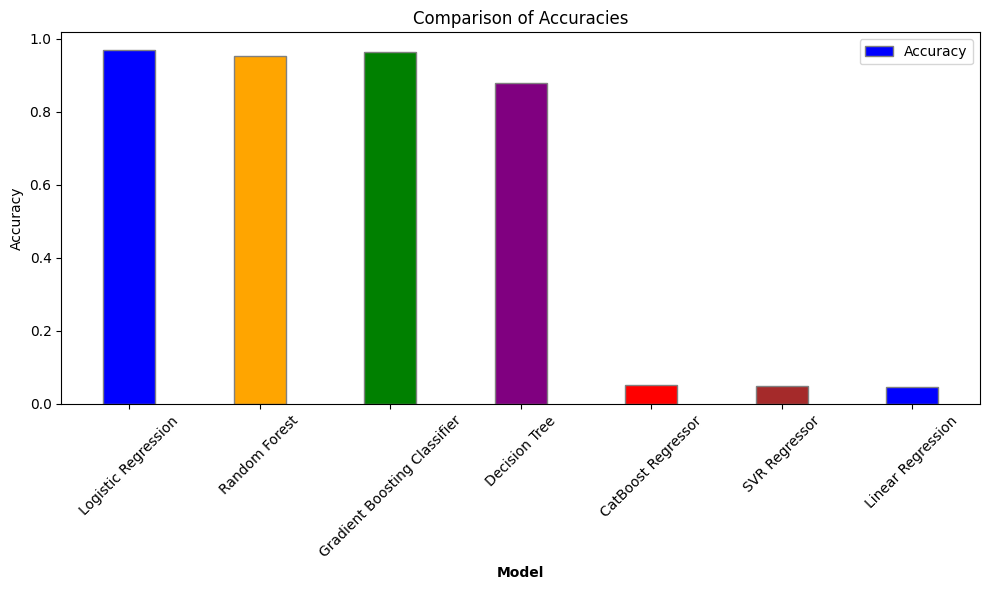

In [80]:
import matplotlib.pyplot as plt
import numpy as np

accuracies = [0.9696969696969697, 0.9523809523809523, 0.9653679653679653, 0.8787878787878788, 0.05117170122632168, 0.04814483898292007, 0.04637129353269493]

labels = ['Logistic Regression', 'Random Forest', 'Gradient Boosting Classifier', 'Decision Tree', 'CatBoost Regressor', 'SVR Regressor', 'Linear Regression']

x = np.arange(len(labels))

# Specifying the figsize in plt.subplots
fig, ax = plt.subplots(figsize=(10, 6))  # You can adjust the values (width, height) as needed

bar_width = 0.4

r1 = np.arange(len(accuracies))
ax.bar(r1, accuracies, color=['blue', 'orange', 'green', 'purple', 'red', 'brown'], width=bar_width, edgecolor='grey', label='Accuracy')

ax.set_xlabel('Model', fontweight='bold')
ax.set_xticks([r for r in range(len(accuracies))])
ax.set_xticklabels(labels, rotation=45)  # Rotating the labels for better readability
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Accuracies')

ax.legend()
plt.tight_layout()  # Adjusts the subplot parameters to give specified padding
plt.show()

### INSIGHTS:

#### LOGISTIC REGRESSION:  
  ##### This typically refers to a linear classification algorithm used for binary classification problems. 
  ##### The high accuracy indicates that the logistic regression model performed well on the dataset.

#### RANDOM FOREST: 
   ##### A popular ensemble learning method known for its robustness and accuracy. The accuracy is relatively high, indicating that the Random Forest model performed well.

#### GRADIENT BOOSTING CLASSIFIER: 
   ##### Another ensemble method, often very accurate due to its sequential training of weak learners. The high accuracy suggests good performance.

#### DECISION TREE: 
   ##### A basic model known for its interpretability. The accuracy is lower compared to ensemble methods, possibly indicating overfitting or limitations of a single decision tree.

#### SVR (SUPPORT VECTOR REGRESSOR):
   ##### An algorithm for regression tasks. The very low accuracy could signify poor performance or unsuitability of this model for the given task or dataset.

#### LINEAR REGRESSION: 
   ##### A basic regression algorithm. The accuracy is quite low, which might suggest that the linear model doesn’t fit the data well or that the problem is not well-suited for linear regression.